<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Sahm_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###클라우디아 샴(Claudia Sahm)에 의해 만들어진 "샴룰(Sahm Rule)"은 경기침체를 예측하는 데 사용되는 경제 지표입니다.

1. 샴룰의 정의

  - 샴룰은 미국 실업률의 최근 3개월 이동평균이 이전 1년 동안의 3개월 이동평균 최저값보다 0.5%포인트 높아졌을 때, 경기침체가 시작되었음을 나타내는 법칙입니다.
  - 이 법칙은 경기침체를 빠르게 감지할 수 있는 간단하면서도 효과적인 지표로, 경제학자 클라우디아 샴에 의해 제안되었습니다.

2. 샴룰의 작동 원리

  - 샴룰은 실업률이라는 지표에 주목합니다. 실업률이 급격히 상승하는 것은 경제 활동이 둔화되고 있다는 신호로 해석될 수 있습니다.
  - 이 법칙은 실업률의 변화를 측정하여 경기침체를 예측하는 방식으로, 실업률이 일정 수준 이상으로 급등할 때 경기침체가 이미 시작되었을 가능성이 높다는 것을 시사합니다.

3. 샴룰의 적용 사례

  - 2008년 금융위기: 샴룰은 2008년 금융위기 당시 경기침체의 시작을 성공적으로 예측한 바 있습니다. 당시 실업률이 급격히 상승하면서 샴룰이 적용되었고, 실제로 경제는 큰 침체를 겪었습니다.
  - 코로나19 팬데믹: 2020년 코로나19 팬데믹 상황에서도 샴룰은 실업률이 급격히 상승하는 것을 감지하여 경기침체를 예측하는 데 사용되었습니다.

4. 샴룰의 중요성

  - 빠른 경기침체 감지: 샴룰은 다른 경제 지표보다 더 신속하게 경기침체를 감지할 수 있어 정책 결정자들이 빠르게 대응할 수 있도록 돕습니다.
간단한 계산: 이 법칙은 복잡한 모델링이 필요 없이 간단한 계산으로 적용할 수 있어, 실무에서 유용하게 사용될 수 있습니다.

5. 샴룰의 한계

  - 실업률 의존성: 샴룰은 실업률에만 의존하기 때문에, 실업률 이외의 다른 경제 요인들은 반영되지 않습니다. 따라서 실업률 외의 요인이 경기침체에 영향을 미치는 경우에는 이 법칙의 정확도가 떨어질 수 있습니다.

  - 선후 관계: 실업률이 경기침체의 원인이 아니라 결과일 수 있기 때문에, 샴룰이 경기침체를 예측하는데 한계가 있을 수 있습니다.


####샴룰은 경제학자들과 정책 결정자들이 경기침체를 신속하게 감지하고 대응할 수 있도록 도와주는 중요한 도구입니다. 다만, 실업률이라는 단일 지표에 의존하기 때문에 이를 보완할 수 있는 다른 지표들과 함께 사용하는 것이 바람직합니다.

In [1]:
import pandas as pd

file_path = '/content/UNRATE.xls'
df = pd.read_excel(file_path)

df['observation_date'] = pd.to_datetime(df['observation_date'])

df['3_month_MA'] = df['UNRATE'].rolling(window=3).mean()

sahm_rule_signal = []

for i in range(12, len(df)):
    # 최근 3개월 이동평균값
    recent_3_month_MA = df.loc[i, '3_month_MA']

    # 이전 1년 동안의 3개월 이동평균값 중 최저값
    past_1_year_min_3_month_MA = df['3_month_MA'][i-12:i].min()

    # 샴룰을 계산
    if recent_3_month_MA - past_1_year_min_3_month_MA >= 0.5:
        sahm_rule_signal.append(True)
    else:
        sahm_rule_signal.append(False)

df = df.iloc[12:].copy()
df['Sahm_Rule_Signal'] = sahm_rule_signal

df.to_csv('sahm_rule_results.csv', index=False)
print(df[['observation_date', 'UNRATE', '3_month_MA', 'Sahm_Rule_Signal']])


    observation_date  UNRATE  3_month_MA  Sahm_Rule_Signal
12        1949-01-01     4.3    4.033333             False
13        1949-02-01     4.7    4.333333              True
14        1949-03-01     5.0    4.666667              True
15        1949-04-01     5.3    5.000000              True
16        1949-05-01     6.1    5.466667              True
..               ...     ...         ...               ...
914       2024-03-01     3.8    3.800000             False
915       2024-04-01     3.9    3.866667             False
916       2024-05-01     4.0    3.900000             False
917       2024-06-01     4.1    4.000000             False
918       2024-07-01     4.3    4.133333              True

[907 rows x 4 columns]


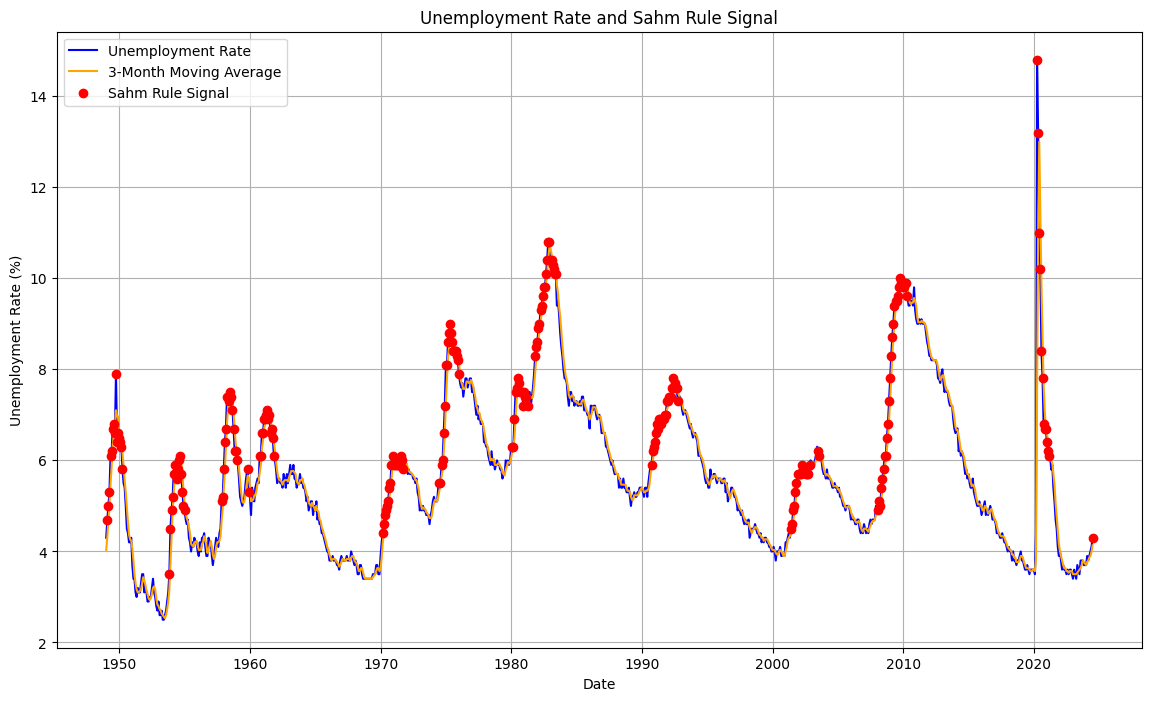

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# 실업률과 3개월 이동평균을 플로팅
plt.plot(df['observation_date'], df['UNRATE'], label='Unemployment Rate', color='blue')
plt.plot(df['observation_date'], df['3_month_MA'], label='3-Month Moving Average', color='orange')

# 샴룰 신호가 발생한 시점을 강조
plt.scatter(df.loc[df['Sahm_Rule_Signal'], 'observation_date'],
            df.loc[df['Sahm_Rule_Signal'], 'UNRATE'],
            color='red', label='Sahm Rule Signal', zorder=5)

plt.title('Unemployment Rate and Sahm Rule Signal')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
sham_signal_dates = df[df['Sahm_Rule_Signal']]['observation_date']

print("Sham's Rule Signal Dates:")
for date in sham_signal_dates:
    print(date.strftime('%Y-%m-%d'))

sham_signal_dates.to_csv('sham_signal_dates.csv', index=False)


Sham's Rule Signal Dates:
1949-02-01
1949-03-01
1949-04-01
1949-05-01
1949-06-01
1949-07-01
1949-08-01
1949-09-01
1949-10-01
1949-11-01
1949-12-01
1950-01-01
1950-02-01
1950-03-01
1950-04-01
1953-11-01
1953-12-01
1954-01-01
1954-02-01
1954-03-01
1954-04-01
1954-05-01
1954-06-01
1954-07-01
1954-08-01
1954-09-01
1954-10-01
1954-11-01
1954-12-01
1955-01-01
1957-11-01
1957-12-01
1958-01-01
1958-02-01
1958-03-01
1958-04-01
1958-05-01
1958-06-01
1958-07-01
1958-08-01
1958-09-01
1958-10-01
1958-11-01
1958-12-01
1959-01-01
1959-11-01
1959-12-01
1960-10-01
1960-11-01
1960-12-01
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01
1961-06-01
1961-07-01
1961-08-01
1961-09-01
1961-10-01
1961-11-01
1970-03-01
1970-04-01
1970-05-01
1970-06-01
1970-07-01
1970-08-01
1970-09-01
1970-10-01
1970-11-01
1970-12-01
1971-01-01
1971-02-01
1971-03-01
1971-04-01
1971-05-01
1971-06-01
1971-07-01
1971-08-01
1971-09-01
1971-10-01
1974-07-01
1974-08-01
1974-09-01
1974-10-01
1974-11-01
1974-12-01
1975-01-01
1975-0

In [9]:
len(df)

907

In [10]:
len(sham_signal_dates)

221